# 🤖 Machine Learning - Dự đoán tiêu thụ điện năng

## 1. 📦 Import thư viện và đọc dữ liệu

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu
df = pd.read_csv("Data/powerconsumption.csv")
df['Datetime'] = pd.to_datetime(df['Datetime'])


## 2. 🧹 Tiền xử lý dữ liệu

In [2]:
# Trích xuất đặc trưng thời gian
df['Hour'] = df['Datetime'].dt.hour
df['Day'] = df['Datetime'].dt.day
df['Month'] = df['Datetime'].dt.month
df['Weekday'] = df['Datetime'].dt.weekday

# Loại bỏ giá trị thiếu
df = df.dropna()

# Chọn đặc trưng và mục tiêu
features = ['Temperature', 'Humidity', 'WindSpeed', 
            'GeneralDiffuseFlows', 'DiffuseFlows', 
            'Hour', 'Day', 'Month', 'Weekday']
target = 'PowerConsumption_Zone1'

X = df[features]
y = df[target]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("✅ Dữ liệu đã chuẩn bị. Số lượng mẫu train:", len(X_train), " test:", len(X_test))


✅ Dữ liệu đã chuẩn bị. Số lượng mẫu train: 41932  test: 10484


## 3. 🔧 Huấn luyện mô hình Linear Regression

In [3]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Linear Regression:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² score:", r2_score(y_test, y_pred_lr))


Linear Regression:
RMSE: 4213.349984653966
R² score: 0.6484298680142493


## 4. 🌲 Huấn luyện mô hình Random Forest

In [4]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² score:", r2_score(y_test, y_pred_rf))


Random Forest:
RMSE: 919.3997845410937
R² score: 0.9832596051960508


## 5. 📉 So sánh kết quả mô hình

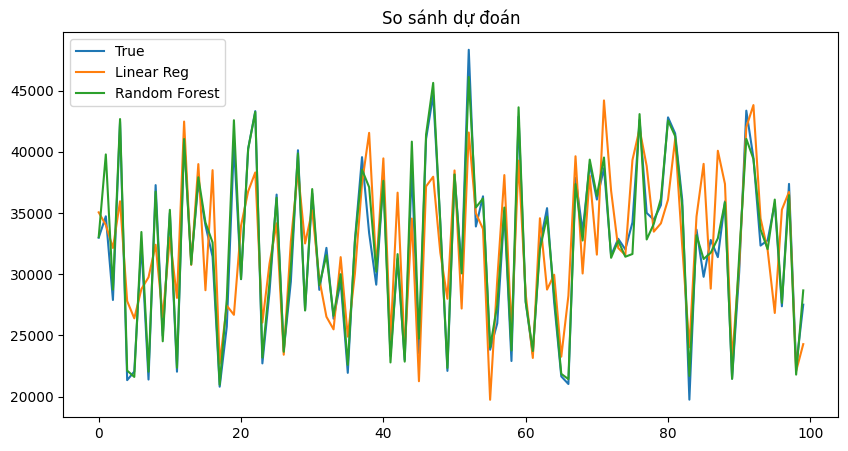

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label="True")
plt.plot(y_pred_lr[:100], label="Linear Reg")
plt.plot(y_pred_rf[:100], label="Random Forest")
plt.title("So sánh dự đoán")
plt.legend()
plt.show()
